In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv('../input/creditcardfraud/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


0    284315
1       492
Name: Class, dtype: int64

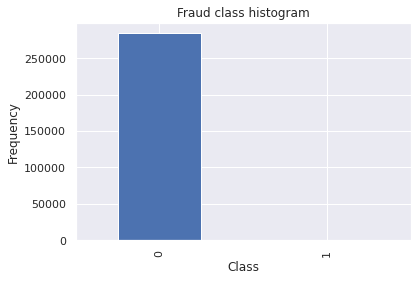

In [3]:
pd.value_counts(data['Class']).plot.bar()
plt.title('Fraud class histogram')
plt.xlabel('Class')
plt.ylabel('Frequency')
data['Class'].value_counts()

In [4]:
print('No Frauds', round(data['Class'].value_counts()[0]/len(data) * 100,2), '% of the dataset')
print('Frauds', round(data['Class'].value_counts()[1]/len(data) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


In [5]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

data['scaled_amount'] = std_scaler.fit_transform(data['Amount'].values.reshape(-1,1))
data['scaled_time'] = std_scaler.fit_transform(data['Time'].values.reshape(-1,1))

data.drop(['Time','Amount'], axis=1, inplace=True)

scaled_amount = data['scaled_amount']
scaled_time = data['scaled_time']

data.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
data.insert(0, 'scaled_amount', scaled_amount)
data.insert(1, 'scaled_time', scaled_time)

In [6]:
dataset = data
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


In [8]:
from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import Pipeline, make_pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


In [9]:
params = {'penalty': ['none', 'l2']}

In [10]:
reg = LogisticRegression(random_state = 42)

In [11]:
imba_pipeline = make_pipeline(SMOTE(random_state=42),reg)
accuracies = cross_val_score(imba_pipeline, X_train, y_train,scoring='accuracy',cv = 10 )
print("Accuracies of Model with Cross Validation are ",accuracies)
print("Accuracy Average: {:.2f} %".format(accuracies.mean()*100))


Accuracies of Model with Cross Validation are  [0.97537568 0.97448621 0.97663967 0.97457984 0.97392444 0.9781367
 0.97593633 0.97598315 0.97368914 0.97771536]
Accuracy Average: 97.56 %


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [12]:
new_params = {'logisticregression__' + key: params[key] for key in params}
grid_imba = GridSearchCV(imba_pipeline, param_grid=new_params, cv=10, scoring='accuracy',
                        return_train_score=True)
grid_imba.fit(X_train, y_train);

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [13]:
grid_imba.best_params_

{'logisticregression__penalty': 'none'}

In [14]:
grid_imba.best_score_

0.9756560156710389

In [15]:
from sklearn.metrics import accuracy_score , recall_score 
y_test_predict = grid_imba.best_estimator_.named_steps['logisticregression'].predict(X_test)
accuracy_score(y_test, y_test_predict)

0.9760399988764361

[[69385  1697]
 [    9   111]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     71082
           1       0.06      0.93      0.12       120

    accuracy                           0.98     71202
   macro avg       0.53      0.95      0.55     71202
weighted avg       1.00      0.98      0.99     71202

accuracy : 0.9760399988764361


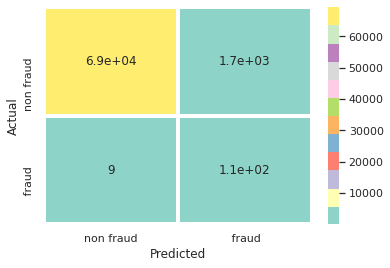

In [16]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test, y_test_predict)
print(cm)
print(classification_report(y_test, y_test_predict))
print('accuracy :',accuracy_score(y_test, y_test_predict))

y_true = ["non fraud"," fraud"]
y_pred = ["non fraud"," fraud"]

df_cm = pd.DataFrame(cm, columns=(y_pred), index = (y_true))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'

sns.heatmap(df_cm,linewidths=3, cmap="Set3", annot=True)
plt.show()

